# Assignment

In [170]:
import torch
from torch import nn
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [171]:
def minmax_norm(x):
    return (x - x.min(axis=0).values) / (x.max(axis=0).values - x.min(axis=0).values)

In [178]:
def calc_acc(data, labels, model):
    count, total = 0, len(labels)
    with torch.no_grad():
        for vector, label in zip(data, labels):
            count += (model(vector).argmax() == label).sum().item()
    return count*100/total
        
def train(data, labels, model, optimizer, loss_fn, epochs, threshold, return_errors=False, **kwargs):
    prev_error, error, epoch, errors = 0, 1e9, 1, []
    while abs(error - prev_error) > threshold and epoch <= epochs:
        prev_error = error
        error = 0
        print(f'Epoch {epoch}\n----------------------------------------')
        for vector, label in zip(data, labels):
            # calc loss
            pred = model(vector)
            loss = loss_fn(pred, label)
            error += loss.item()
            # param update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        error = error/len(labels)
        if return_errors:
            errors.append(error)
        epoch += 1
        if kwargs.get('accuracy'):
            train_acc = calc_acc(data, labels, model)
            val_acc = calc_acc(kwargs.get('val_data'), kwargs.get('val_labels'), model)
            print(f'Train accuracy = {train_acc:.2f}')
            print(f'Validation accuracy = {val_acc:.2f}')
        print(f'Loss = {error:.6f}')
        print(f'Diff = {abs(error-prev_error):.6f}')
        print()
    return errors if return_errors else None

In [173]:
def load_data(which):
    os.chdir('/home/pongthang/Documents/6thSem/deepLearning/Ass4/cv')
    filenames = glob(f'*/{which}/*.mfcc')
    data, labels = [], []
    for filename in filenames:
        with open(filename, 'r') as in_file:
            seq = in_file.readlines()
            seq_data=[x.strip().split(' ') for x in seq]
            seq_data=torch.from_numpy(np.array(seq_data,dtype=np.float32))
            data.append(minmax_norm(seq_data))
        labels.append(filename.split('/')[0])
    classes = np.unique(labels)
    class2index = {x: i for i, x in enumerate(classes)}
    labels = torch.tensor([class2index[x] for x in labels])
    data_ = data
    # shuffle data
    random_indices = torch.randperm(len(labels))
    data = [data_[i] for i in random_indices]
    labels = labels[random_indices]
    return data, labels

In [174]:
train_data, train_label = load_data('Train')
test_data, test_label = load_data('Test')

In [94]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)
        
        self.fcnn = nn.Sequential(
            nn.Linear(hidden_size, output_size),
            nn.Softmax(dim=1)
        )
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        self.loss_fn = nn.CrossEntropyLoss()
        
    def forward(self, X):
        h0 = torch.zeros(self.num_layers, self.hidden_size)
        output, hn = self.rnn(X, h0)
        return self.fcnn(output)[-1]

In [96]:
t = RNN(39,10,5,1)

In [97]:
train(train_data, train_label, t, t.optimizer, t.loss_fn, 80, 1e-4, return_errors=True)

Epoch 1
----------------------------------------
torch.Size([10, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch

torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
t

torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
t

torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([56, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
to

torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
tor

torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
t

torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
to

torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
to

torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
to

torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
to

torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.352701
Diff = 0.015095

Epoch 7

torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
to

torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([53, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
to

torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
tor

torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([56, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
to

torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
tor

torch.Size([22, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
tor

torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
to

torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
to

torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([56, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
to

torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
to

torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
tor

torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
to

torch.Size([7, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
to

torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
to

torch.Size([8, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
to

torch.Size([8, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([53, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
to

torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([55, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
to

torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([56, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
t

torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
to

torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
tor

torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
to

torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
to

torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
to

torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
to

torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([53, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
to

torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
to

torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
tor

torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
to

torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
to

torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
to

torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
to

torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
to

torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
to

torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
tor

torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
tor

torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
to

torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([32, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.219385
Diff = 0.000326

Epoch 37
----------------------------------------
torch.Size([10, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size

torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
to

torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
tor

torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
tor

torch.Size([24, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
to

torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
tor

torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([53, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
t

torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([56, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
to

torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
t

torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([55, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
to

torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.221281
Diff = 0.089964

Epoch 43
----------------------------------------
torch.Size([10, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size

torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
tor

torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
t

torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
to

torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
tor

torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
to

torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
to

torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
tor

torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
to

torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
to

torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
to

torch.Size([6, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
to

torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.200954
Diff = 0.008243

Epoch 48
----------------------------------------
torch.Size([10, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size

torch.Size([42, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([53, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
to

torch.Size([15, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
tor

torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
t

torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
t

torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
to

torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
to

torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
to

torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
tor

torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
to

torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
to

torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
to

torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
t

torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
to

torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
tor

torch.Size([33, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
tor

torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
t

torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([27, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
to

torch.Size([32, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.192357
Diff = 0.018059

Epoch 61
----------------------------------------
torch.Size([10, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size

torch.Size([17, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
to

torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([60, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([55, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
to

torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
tor

torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
t

torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
t

torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
to

torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
t

torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
t

torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
to

torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
t

torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
to

torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
to

torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([15, 39])
tor

torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([49, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([65, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
tor

torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([42, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([25, 39])
t

torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
to

torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
t

torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
to

torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
t

torch.Size([28, 39])
torch.Size([5])
torch.Size([55, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([47, 39])
torch.Size([5])
to

torch.Size([29, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
t

torch.Size([35, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([59, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
t

torch.Size([20, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
to

torch.Size([19, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
t

torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([73, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([48, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
to

torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
tor

torch.Size([20, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
t

torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([52, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
t

torch.Size([21, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
t

torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([8, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([31, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([37, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
tor

torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([46, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
t

torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([10, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
to

torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([39, 39])
torch.Size([5])
t

torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([45, 39])
torch.Size([5])
torch.Size([6, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([43, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
t

torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([35, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([22, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([41, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
t

torch.Size([9, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([22, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([12, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([23, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([11, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([40, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
to

torch.Size([20, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([38, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([21, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([24, 39])
torch.Size([5])
torch.Size([7, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([34, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([33, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
to

torch.Size([25, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([17, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([13, 39])
torch.Size([5])
torch.Size([16, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([27, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([29, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([14, 39])
torch.Size([5])
torch.Size([26, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([18, 39])
torch.Size([5])
torch.Size([19, 39])
torch.Size([5])
torch.Size([36, 39])
torch.Size([5])
torch.Size([28, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([20, 39])
torch.Size([5])
torch.Size([44, 39])
torch.Size([5])
torch.Size([15, 39])
torch.Size([5])
torch.Size([25, 39])
torch.Size([5])
torch.Size([30, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
torch.Size([32, 39])
torch.Size([5])
to

torch.Size([9, 39])
torch.Size([5])
torch.Size([9, 39])
torch.Size([5])
Loss = 1.199710
Diff = 0.008648



[1.4848161739929049,
 1.4209818155625287,
 1.4062641112477172,
 1.3841229761815539,
 1.3677962396659102,
 1.35270111098009,
 1.345893825970444,
 1.3262762626947142,
 1.315549721063352,
 1.3119776769245373,
 1.3038892141510459,
 1.2960673689374738,
 1.2916496395129784,
 1.295959714347241,
 1.2802461274464925,
 1.271546571815715,
 1.2693598837478488,
 1.2569322041436737,
 1.2582030927901175,
 1.2592418955821616,
 1.2503262055621427,
 1.239249271177778,
 1.239091472158245,
 1.2456485618797004,
 1.2363527162869772,
 1.2338390491055506,
 1.2277637028226664,
 1.2282099632655874,
 1.2331105276650074,
 1.222355652883941,
 1.2266358248860227,
 1.2182897302216174,
 1.2139791374113045,
 1.237562647006091,
 1.2190587038619844,
 1.2193845714307299,
 1.2160333264107797,
 1.2216151260862163,
 1.2276138466012245,
 1.215777253777373,
 1.3112454806589613,
 1.221281203662648,
 1.1968090700635723,
 1.2111325049867816,
 1.2117541035951354,
 1.209196693570006,
 1.2009539542946162,
 1.2016942234132804,
 1.21

In [8]:
accu_train_rnn=[]
error_train_rnn = []
accu_test_rnn = []

In [ ]:
%%time

train_data, train_label = load_data('Train')
test_data, test_label = load_data('Test')
for i in range(1,50,5):
    rnn = RNN(39

In [9]:
,i,5,1)
    errors = train(train_data, train_label, rnn, rnn.optimizer, rnn.loss_fn, 80, 1e-4, return_errors=True)
    accu_test_rnn.append(calc_acc(test_data, test_label, rnn))
    accu_train_rnn.append(calc_acc(train_data, train_label, rnn))
    error_train_rnn.append(errors)

Epoch 1
----------------------------------------
Loss = 1.605298
Diff = 999999998.394702

Epoch 2
----------------------------------------
Loss = 1.590478
Diff = 0.014820

Epoch 3
----------------------------------------
Loss = 1.586535
Diff = 0.003943

Epoch 4
----------------------------------------
Loss = 1.584519
Diff = 0.002016

Epoch 5
----------------------------------------
Loss = 1.583381
Diff = 0.001138

Epoch 6
----------------------------------------
Loss = 1.582680
Diff = 0.000701

Epoch 7
----------------------------------------
Loss = 1.582217
Diff = 0.000463

Epoch 8
----------------------------------------
Loss = 1.581895
Diff = 0.000322

Epoch 9
----------------------------------------
Loss = 1.581663
Diff = 0.000232

Epoch 10
----------------------------------------
Loss = 1.581490
Diff = 0.000172

Epoch 11
----------------------------------------
Loss = 1.581359
Diff = 0.000131

Epoch 12
----------------------------------------
Loss = 1.581257
Diff = 0.000102

Epoch

Loss = 1.298671
Diff = 0.012185

Epoch 8
----------------------------------------
Loss = 1.291236
Diff = 0.007434

Epoch 9
----------------------------------------
Loss = 1.281700
Diff = 0.009536

Epoch 10
----------------------------------------
Loss = 1.275633
Diff = 0.006068

Epoch 11
----------------------------------------
Loss = 1.266294
Diff = 0.009339

Epoch 12
----------------------------------------
Loss = 1.260262
Diff = 0.006032

Epoch 13
----------------------------------------
Loss = 1.250957
Diff = 0.009305

Epoch 14
----------------------------------------
Loss = 1.244645
Diff = 0.006312

Epoch 15
----------------------------------------
Loss = 1.252241
Diff = 0.007596

Epoch 16
----------------------------------------
Loss = 1.240228
Diff = 0.012013

Epoch 17
----------------------------------------
Loss = 1.232043
Diff = 0.008185

Epoch 18
----------------------------------------
Loss = 1.235125
Diff = 0.003082

Epoch 19
----------------------------------------
Loss =

Loss = 1.212165
Diff = 0.005639

Epoch 27
----------------------------------------
Loss = 1.205781
Diff = 0.006385

Epoch 28
----------------------------------------
Loss = 1.216150
Diff = 0.010369

Epoch 29
----------------------------------------
Loss = 1.196696
Diff = 0.019454

Epoch 30
----------------------------------------
Loss = 1.221830
Diff = 0.025135

Epoch 31
----------------------------------------
Loss = 1.231472
Diff = 0.009642

Epoch 32
----------------------------------------
Loss = 1.193589
Diff = 0.037883

Epoch 33
----------------------------------------
Loss = 1.201387
Diff = 0.007798

Epoch 34
----------------------------------------
Loss = 1.207015
Diff = 0.005629

Epoch 35
----------------------------------------
Loss = 1.191156
Diff = 0.015859

Epoch 36
----------------------------------------
Loss = 1.197385
Diff = 0.006229

Epoch 37
----------------------------------------
Loss = 1.187402
Diff = 0.009983

Epoch 38
----------------------------------------
Loss

Loss = 1.202100
Diff = 0.012044

Epoch 30
----------------------------------------
Loss = 1.180242
Diff = 0.021859

Epoch 31
----------------------------------------
Loss = 1.204124
Diff = 0.023882

Epoch 32
----------------------------------------
Loss = 1.186363
Diff = 0.017760

Epoch 33
----------------------------------------
Loss = 1.238490
Diff = 0.052127

Epoch 34
----------------------------------------
Loss = 1.208209
Diff = 0.030281

Epoch 35
----------------------------------------
Loss = 1.215335
Diff = 0.007126

Epoch 36
----------------------------------------
Loss = 1.189597
Diff = 0.025738

Epoch 37
----------------------------------------
Loss = 1.186112
Diff = 0.003485

Epoch 38
----------------------------------------
Loss = 1.191127
Diff = 0.005014

Epoch 39
----------------------------------------
Loss = 1.168528
Diff = 0.022599

Epoch 40
----------------------------------------
Loss = 1.181356
Diff = 0.012827

Epoch 41
----------------------------------------
Loss

Loss = 1.296878
Diff = 0.021023

Epoch 7
----------------------------------------
Loss = 1.287780
Diff = 0.009097

Epoch 8
----------------------------------------
Loss = 1.288312
Diff = 0.000531

Epoch 9
----------------------------------------
Loss = 1.283886
Diff = 0.004425

Epoch 10
----------------------------------------
Loss = 1.283128
Diff = 0.000758

Epoch 11
----------------------------------------
Loss = 1.268714
Diff = 0.014414

Epoch 12
----------------------------------------
Loss = 1.261988
Diff = 0.006727

Epoch 13
----------------------------------------
Loss = 1.244434
Diff = 0.017554

Epoch 14
----------------------------------------
Loss = 1.236664
Diff = 0.007770

Epoch 15
----------------------------------------
Loss = 1.242891
Diff = 0.006228

Epoch 16
----------------------------------------
Loss = 1.251677
Diff = 0.008786

Epoch 17
----------------------------------------
Loss = 1.224237
Diff = 0.027440

Epoch 18
----------------------------------------
Loss = 

Loss = 1.211511
Diff = 0.009882

Epoch 26
----------------------------------------
Loss = 1.221347
Diff = 0.009835

Epoch 27
----------------------------------------
Loss = 1.211586
Diff = 0.009760

Epoch 28
----------------------------------------
Loss = 1.209726
Diff = 0.001860

Epoch 29
----------------------------------------
Loss = 1.199438
Diff = 0.010288

Epoch 30
----------------------------------------
Loss = 1.202506
Diff = 0.003068

Epoch 31
----------------------------------------
Loss = 1.195170
Diff = 0.007336

Epoch 32
----------------------------------------
Loss = 1.203969
Diff = 0.008799

Epoch 33
----------------------------------------
Loss = 1.186698
Diff = 0.017270

Epoch 34
----------------------------------------
Loss = 1.173522
Diff = 0.013177

Epoch 35
----------------------------------------
Loss = 1.204567
Diff = 0.031045

Epoch 36
----------------------------------------
Loss = 1.183013
Diff = 0.021554

Epoch 37
----------------------------------------
Loss

Loss = 1.163089
Diff = 0.012985

Epoch 45
----------------------------------------
Loss = 1.179330
Diff = 0.016241

Epoch 46
----------------------------------------
Loss = 1.190674
Diff = 0.011344

Epoch 47
----------------------------------------
Loss = 1.196215
Diff = 0.005541

Epoch 48
----------------------------------------
Loss = 1.190205
Diff = 0.006010

Epoch 49
----------------------------------------
Loss = 1.163282
Diff = 0.026923

Epoch 50
----------------------------------------
Loss = 1.200809
Diff = 0.037526

Epoch 51
----------------------------------------
Loss = 1.172001
Diff = 0.028807

Epoch 52
----------------------------------------
Loss = 1.154556
Diff = 0.017446

Epoch 53
----------------------------------------
Loss = 1.177806
Diff = 0.023250

Epoch 54
----------------------------------------
Loss = 1.163058
Diff = 0.014748

Epoch 55
----------------------------------------
Loss = 1.164226
Diff = 0.001168

Epoch 56
----------------------------------------
Loss

In [11]:
rnn_units = [i for i in range(1,50,5)]
rnn_units

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

In [30]:
# for i in range(len(rnn_units)):
#     plt.figure()
#     plt.plot([j for j in range(1, len(error_train_rnn[i])+1)],error_train_rnn[i])
#     plt.title(f'Training Error vs Epoch for #lstm units = {rnn_units[i]}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Error')
#     plt.show()

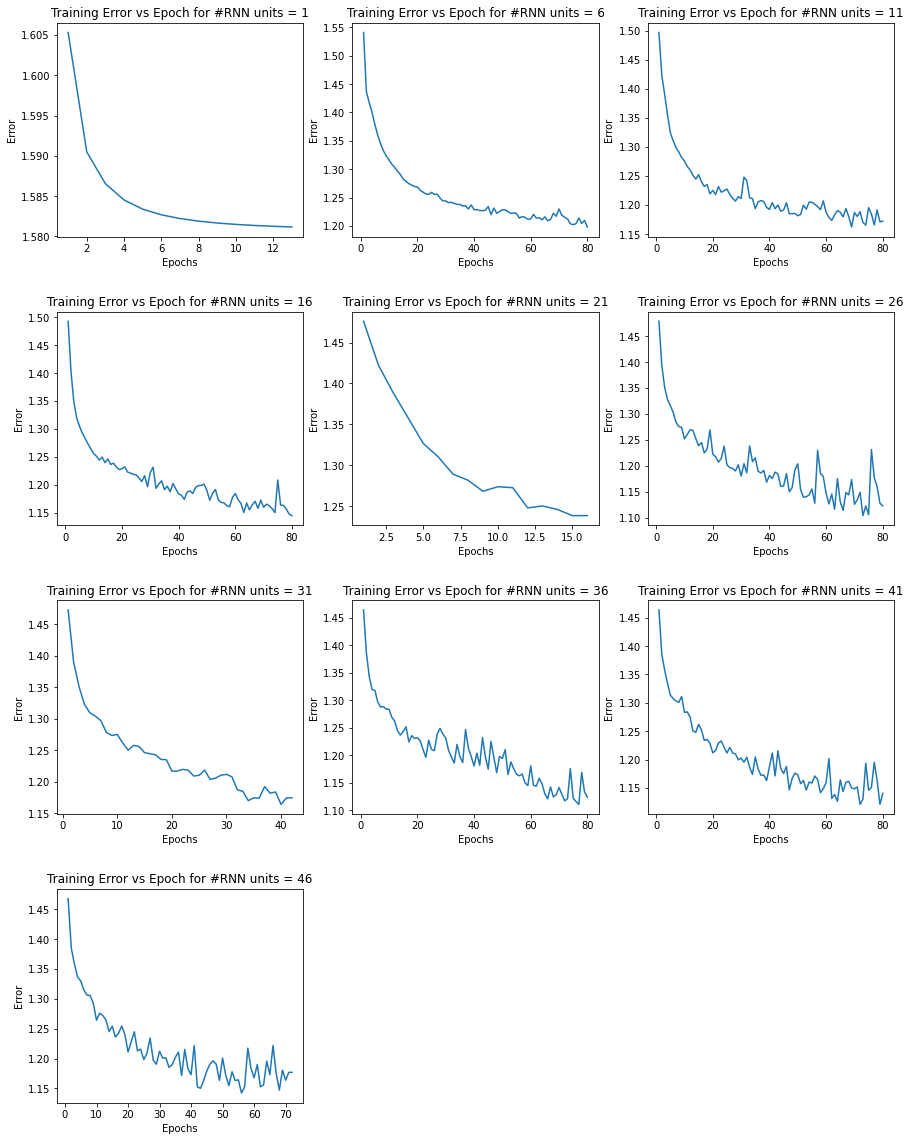

In [43]:
cols = 3
rows = 4
fig, axes = plt.subplots(rows,cols,figsize=(15,15))
[axi.set_axis_off() for axi in axes.ravel()]
    
for i in range(len(rnn_units)):
    fig.add_subplot(rows, cols, i+1)
    plt.plot([j for j in range(1, len(error_train_rnn[i])+1)],error_train_rnn[i])
    plt.title(f'Training Error vs Epoch for #RNN units = {rnn_units[i]}')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    
plt.subplots_adjust(left=0.125,
                    bottom=0.0, 
                    right=0.9, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show()

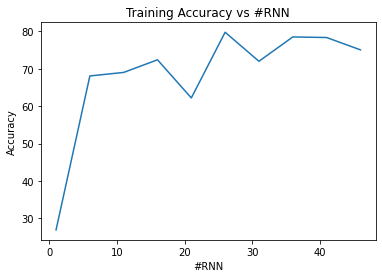

In [46]:
plt.plot(rnn_units,accu_train_rnn)
plt.title(f'Training Accuracy vs #RNN')
plt.xlabel('#RNN')
plt.ylabel('Accuracy')

plt.show()

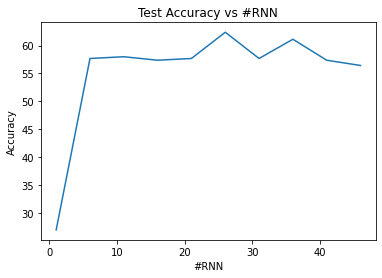

In [47]:
plt.plot(rnn_units,accu_test_rnn)
plt.title(f'Test Accuracy vs #RNN')
plt.xlabel('#RNN')
plt.ylabel('Accuracy')

plt.show()

In [152]:
a= accu_test_rnn[np.array(accu_test_rnn).argmax()]
print(f'Best model has test accuracy = {a}% , training accuracy = {accu_train_rnn[np.array(accu_test_rnn).argmax()]}% , and #RNN units = {rnn_units[np.array(accu_test_rnn).argmax()]}')

Best model has test accuracy = 62.38244514106583% , training accuracy = 79.76470588235294% , and #RNN units = 26


In [165]:
def train_best(data, labels, model, optimizer, loss_fn, epochs, threshold, return_errors=False, **kwargs):
    prev_error, error, epoch, errors = 0, 1e9, 1, []
    
    while abs(error - prev_error) > threshold and epoch <= epochs:
        predictions = []
        prev_error = error
        error = 0
        print(f'Epoch {epoch}\n----------------------------------------')
        for vector, label in zip(data, labels):
            # calc loss
            pred = model(vector)
            
            predi = pred.detach().numpy()
            predictions.append(predi)
            loss = loss_fn(pred, label)
            error += loss.item()
            # param update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        error = error/len(labels)
        if return_errors:
            errors.append(error)
        epoch += 1
        if kwargs.get('accuracy'):
            train_acc = calc_acc(data, labels, model)
            val_acc = calc_acc(kwargs.get('val_data'), kwargs.get('val_labels'), model)
            print(f'Train accuracy = {train_acc:.2f}')
            print(f'Validation accuracy = {val_acc:.2f}')
        print(f'Loss = {error:.6f}')
        print(f'Diff = {abs(error-prev_error):.6f}')
        print()
    return predictions if return_errors else None

In [166]:
train_data, train_label = load_data('Train')
test_data, test_label = load_data('Test')
rnn = RNN(39,rnn_units[np.array(accu_test_rnn).argmax()],5,1)
predicted = train_best(test_data, test_label, rnn, rnn.optimizer, rnn.loss_fn, 80, 1e-4, return_errors=True)



Epoch 1
----------------------------------------
Loss = 1.563513
Diff = 999999998.436487

Epoch 2
----------------------------------------
Loss = 1.453473
Diff = 0.110040

Epoch 3
----------------------------------------
Loss = 1.455823
Diff = 0.002349

Epoch 4
----------------------------------------
Loss = 1.400762
Diff = 0.055061

Epoch 5
----------------------------------------
Loss = 1.393389
Diff = 0.007373

Epoch 6
----------------------------------------
Loss = 1.365787
Diff = 0.027603

Epoch 7
----------------------------------------
Loss = 1.377527
Diff = 0.011741

Epoch 8
----------------------------------------
Loss = 1.345739
Diff = 0.031789

Epoch 9
----------------------------------------
Loss = 1.335631
Diff = 0.010108

Epoch 10
----------------------------------------
Loss = 1.330353
Diff = 0.005278

Epoch 11
----------------------------------------
Loss = 1.314196
Diff = 0.016157

Epoch 12
----------------------------------------
Loss = 1.326636
Diff = 0.012440

Epoch

In [167]:
predicted = np.array(predicted)
predictions = [predicted[i].argmax() for i in range(len(predicted))]
predictions = np.array(predictions)
true_labels = test_label.detach().numpy()
confusion_matrix(true_labels, predictions)

array([[23,  3, 18,  2,  2],
       [ 1, 34,  4,  1, 13],
       [10,  0, 65,  3,  2],
       [11,  3, 25, 10,  3],
       [ 0, 10,  3,  0, 73]])

In [176]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers)
        
        self.fcnn = nn.Sequential(
            nn.Linear(hidden_size, output_size),
            nn.Softmax(dim=1)
        )
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        self.loss_fn = nn.CrossEntropyLoss()
        
    def forward(self, X):
        h0 = torch.zeros(self.num_layers, self.hidden_size)
        c0= torch.zeros(self.num_layers, self.hidden_size)
        output, (hn,cn) = self.rnn(X)
        return self.fcnn(output)[-1]

In [52]:
rnn = LSTM(39,10,5,1)
errors = train(train_data, train_label, rnn, rnn.optimizer, rnn.loss_fn, 100, 1e-4, return_errors=True)

Epoch 1
----------------------------------------


KeyboardInterrupt: 

In [53]:
train_data, train_label = load_data('Train')
test_data, test_label = load_data('Test')
for i in range(1,50,5):
    rnn = RNN(39,i,5,1)
    errors = train(train_data, train_label, rnn, rnn.optimizer, rnn.loss_fn, 100, 1e-4, return_errors=True)
    accur_d_rnn.append(calc_acc(test_data, test_label, rnn))

Epoch 1
----------------------------------------
Loss = 1.593649
Diff = 999999998.406351

Epoch 2
----------------------------------------
Loss = 1.509474
Diff = 0.084174

Epoch 3
----------------------------------------
Loss = 1.454958
Diff = 0.054516

Epoch 4
----------------------------------------
Loss = 1.434791
Diff = 0.020167

Epoch 5
----------------------------------------
Loss = 1.426663
Diff = 0.008127

Epoch 6
----------------------------------------
Loss = 1.421607
Diff = 0.005056

Epoch 7
----------------------------------------
Loss = 1.417898
Diff = 0.003709

Epoch 8
----------------------------------------
Loss = 1.415665
Diff = 0.002233

Epoch 9
----------------------------------------
Loss = 1.411594
Diff = 0.004071

Epoch 10
----------------------------------------
Loss = 1.406434
Diff = 0.005160

Epoch 11
----------------------------------------
Loss = 1.399701
Diff = 0.006733

Epoch 12
----------------------------------------
Loss = 1.391832
Diff = 0.007869

Epoch

Loss = 1.317374
Diff = 0.013344

Epoch 9
----------------------------------------
Loss = 1.308882
Diff = 0.008492

Epoch 10
----------------------------------------
Loss = 1.303108
Diff = 0.005773

Epoch 11
----------------------------------------
Loss = 1.293161
Diff = 0.009947

Epoch 12
----------------------------------------
Loss = 1.284504
Diff = 0.008657

Epoch 13
----------------------------------------
Loss = 1.279963
Diff = 0.004541

Epoch 14
----------------------------------------
Loss = 1.272369
Diff = 0.007594

Epoch 15
----------------------------------------
Loss = 1.267109
Diff = 0.005260

Epoch 16
----------------------------------------
Loss = 1.259788
Diff = 0.007321

Epoch 17
----------------------------------------
Loss = 1.254878
Diff = 0.004910

Epoch 18
----------------------------------------
Loss = 1.262589
Diff = 0.007711

Epoch 19
----------------------------------------
Loss = 1.247271
Diff = 0.015317

Epoch 20
----------------------------------------
Loss 

Loss = 1.041580
Diff = 0.005400

Epoch 81
----------------------------------------
Loss = 1.019697
Diff = 0.021883

Epoch 82
----------------------------------------
Loss = 1.062849
Diff = 0.043151

Epoch 83
----------------------------------------
Loss = 1.037330
Diff = 0.025519

Epoch 84
----------------------------------------
Loss = 1.034621
Diff = 0.002709

Epoch 85
----------------------------------------
Loss = 1.054084
Diff = 0.019463

Epoch 86
----------------------------------------
Loss = 1.021450
Diff = 0.032634

Epoch 87
----------------------------------------
Loss = 1.032598
Diff = 0.011147

Epoch 88
----------------------------------------
Loss = 1.039542
Diff = 0.006944

Epoch 89
----------------------------------------
Loss = 1.026944
Diff = 0.012598

Epoch 90
----------------------------------------
Loss = 1.036379
Diff = 0.009435

Epoch 91
----------------------------------------
Loss = 1.030398
Diff = 0.005981

Epoch 92
----------------------------------------
Loss

Loss = 1.018108
Diff = 0.017608

Epoch 80
----------------------------------------
Loss = 0.997182
Diff = 0.020926

Epoch 81
----------------------------------------
Loss = 1.012244
Diff = 0.015061

Epoch 82
----------------------------------------
Loss = 1.020248
Diff = 0.008004

Epoch 83
----------------------------------------
Loss = 1.016440
Diff = 0.003807

Epoch 84
----------------------------------------
Loss = 1.006642
Diff = 0.009798

Epoch 85
----------------------------------------
Loss = 0.994260
Diff = 0.012382

Epoch 86
----------------------------------------
Loss = 1.000105
Diff = 0.005845

Epoch 87
----------------------------------------
Loss = 1.028044
Diff = 0.027938

Epoch 88
----------------------------------------
Loss = 1.043461
Diff = 0.015418

Epoch 89
----------------------------------------
Loss = 1.047622
Diff = 0.004161

Epoch 90
----------------------------------------
Loss = 1.010116
Diff = 0.037507

Epoch 91
----------------------------------------
Loss

Loss = 1.127716
Diff = 0.013142

Epoch 24
----------------------------------------
Loss = 1.139054
Diff = 0.011338

Epoch 25
----------------------------------------
Loss = 1.125023
Diff = 0.014030

Epoch 26
----------------------------------------
Loss = 1.117112
Diff = 0.007911

Epoch 27
----------------------------------------
Loss = 1.107164
Diff = 0.009948

Epoch 28
----------------------------------------
Loss = 1.102054
Diff = 0.005110

Epoch 29
----------------------------------------
Loss = 1.091952
Diff = 0.010102

Epoch 30
----------------------------------------
Loss = 1.107616
Diff = 0.015664

Epoch 31
----------------------------------------
Loss = 1.102961
Diff = 0.004655

Epoch 32
----------------------------------------
Loss = 1.100789
Diff = 0.002172

Epoch 33
----------------------------------------
Loss = 1.075576
Diff = 0.025213

Epoch 34
----------------------------------------
Loss = 1.081442
Diff = 0.005866

Epoch 35
----------------------------------------
Loss

Loss = 1.014124
Diff = 0.011970

Epoch 65
----------------------------------------
Loss = 0.997538
Diff = 0.016586

Epoch 66
----------------------------------------
Loss = 0.987283
Diff = 0.010255

Epoch 67
----------------------------------------
Loss = 0.980113
Diff = 0.007169

Epoch 68
----------------------------------------
Loss = 1.039609
Diff = 0.059496

Epoch 69
----------------------------------------
Loss = 1.028678
Diff = 0.010931

Epoch 70
----------------------------------------
Loss = 1.005083
Diff = 0.023595

Epoch 71
----------------------------------------
Loss = 0.985960
Diff = 0.019123

Epoch 72
----------------------------------------
Loss = 0.977784
Diff = 0.008176

Epoch 73
----------------------------------------
Loss = 0.988265
Diff = 0.010481

Epoch 74
----------------------------------------
Loss = 0.998644
Diff = 0.010379

Epoch 75
----------------------------------------
Loss = 0.984758
Diff = 0.013886

Epoch 76
----------------------------------------
Loss

Loss = 1.012471
Diff = 0.017448

Epoch 64
----------------------------------------
Loss = 1.000316
Diff = 0.012155

Epoch 65
----------------------------------------
Loss = 0.996229
Diff = 0.004087

Epoch 66
----------------------------------------
Loss = 1.008356
Diff = 0.012127

Epoch 67
----------------------------------------
Loss = 0.983071
Diff = 0.025285

Epoch 68
----------------------------------------
Loss = 0.985801
Diff = 0.002730

Epoch 69
----------------------------------------
Loss = 1.006064
Diff = 0.020263

Epoch 70
----------------------------------------
Loss = 0.994548
Diff = 0.011516

Epoch 71
----------------------------------------
Loss = 0.977496
Diff = 0.017052

Epoch 72
----------------------------------------
Loss = 0.981792
Diff = 0.004295

Epoch 73
----------------------------------------
Loss = 0.993347
Diff = 0.011555

Epoch 74
----------------------------------------
Loss = 0.994020
Diff = 0.000674

Epoch 75
----------------------------------------
Loss

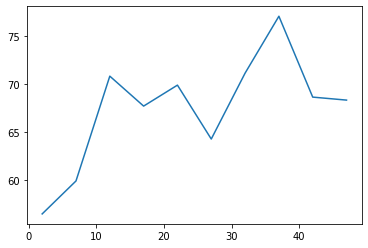

In [54]:
plt.plot(list(range(2,50,5)),accur_lstm)

In [55]:
accur_lstm[np.array(accur_lstm).argmax()]

77.11598746081505

In [56]:
x=list(range(2,50,5))
x[np.array(accur_lstm).argmax()]
       

37

In [168]:
list(range(1,7,2))

[1, 3, 5]

In [180]:
train_data, train_label = load_data('Train')
test_data, test_label = load_data('Test')
train_acuu=[]
test_acuu=[]
error_lstm_hl=[]
for i in range(1,7,2):
    rnn = LSTM(39,32,5,i)
    errors = train(train_data, train_label, rnn, rnn.optimizer, rnn.loss_fn, 80, 1e-4, return_errors=True)
    error_lstm_hl.append(errors)
    test_acuu.append(calc_acc(test_data, test_label, rnn))
    train_acuu.append(calc_acc(train_data, train_label, rnn))
    

Epoch 1
----------------------------------------
Loss = 1.478800
Diff = 999999998.521200

Epoch 2
----------------------------------------
Loss = 1.404851
Diff = 0.073949

Epoch 3
----------------------------------------
Loss = 1.373910
Diff = 0.030942

Epoch 4
----------------------------------------
Loss = 1.340467
Diff = 0.033442

Epoch 5
----------------------------------------
Loss = 1.310265
Diff = 0.030202

Epoch 6
----------------------------------------
Loss = 1.280537
Diff = 0.029728

Epoch 7
----------------------------------------
Loss = 1.252873
Diff = 0.027664

Epoch 8
----------------------------------------
Loss = 1.244306
Diff = 0.008567

Epoch 9
----------------------------------------
Loss = 1.226032
Diff = 0.018274

Epoch 10
----------------------------------------
Loss = 1.216830
Diff = 0.009202

Epoch 11
----------------------------------------
Loss = 1.192722
Diff = 0.024108

Epoch 12
----------------------------------------
Loss = 1.185501
Diff = 0.007221

Epoch

Loss = 1.231883
Diff = 0.047337

Epoch 21
----------------------------------------
Loss = 1.212714
Diff = 0.019169

Epoch 22
----------------------------------------
Loss = 1.250829
Diff = 0.038114

Epoch 23
----------------------------------------
Loss = 1.226797
Diff = 0.024032

Epoch 24
----------------------------------------
Loss = 1.226061
Diff = 0.000735

Epoch 25
----------------------------------------
Loss = 1.218112
Diff = 0.007949

Epoch 26
----------------------------------------
Loss = 1.213008
Diff = 0.005104

Epoch 27
----------------------------------------
Loss = 1.224941
Diff = 0.011932

Epoch 28
----------------------------------------
Loss = 1.187983
Diff = 0.036958

Epoch 29
----------------------------------------
Loss = 1.176973
Diff = 0.011010

Epoch 30
----------------------------------------
Loss = 1.209766
Diff = 0.032794

Epoch 31
----------------------------------------
Loss = 1.239969
Diff = 0.030203

Epoch 32
----------------------------------------
Loss

In [181]:
train_acuu[np.array(train_acuu).argmax()]

88.86274509803921

In [207]:
train_acuu


[88.86274509803921, 72.47058823529412, 74.82352941176471]

In [206]:
test_acuu

[72.41379310344827, 64.26332288401254, 61.755485893416925]

In [182]:
list(range(1,7,2))[np.array(train_acuu).argmax()]

1

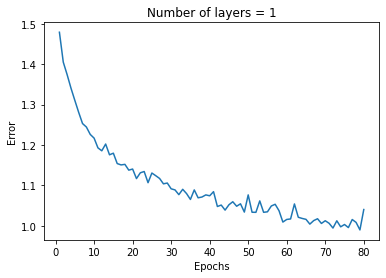

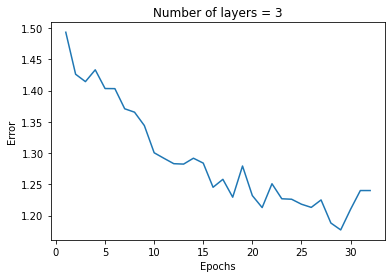

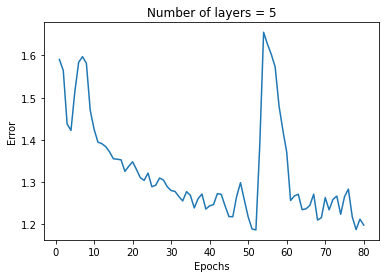

In [190]:
for j,i in enumerate(error_lstm_hl):
    x=list(range(1,len(i)+1))
    plt.figure()
    plt.title(f'Number of layers = {list(range(1,7,2))[j]}')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.plot(x,i)
    plt.show()

Text(0, 0.5, 'Accuracy')

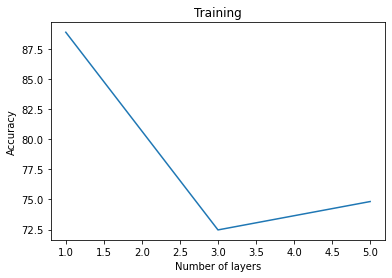

In [185]:
x=list(range(1,7,2))
plt.plot(x,train_acuu)
plt.title("Training")
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

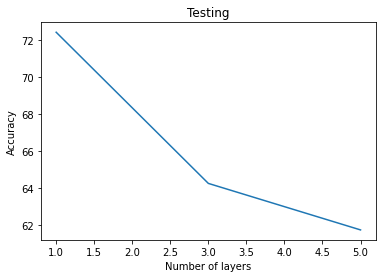

In [186]:
x=list(range(1,7,2))
plt.plot(x,test_acuu)
plt.title("Testing")
plt.xlabel("Number of layers")
plt.ylabel("Accuracy")

In [191]:
rnn_best = LSTM(39,32,5,1)
errors = train(train_data, train_label, rnn_best, rnn_best.optimizer, rnn_best.loss_fn, 80, 1e-4, return_errors=True)

Epoch 1
----------------------------------------
Loss = 1.478486
Diff = 999999998.521514

Epoch 2
----------------------------------------
Loss = 1.407091
Diff = 0.071395

Epoch 3
----------------------------------------
Loss = 1.362596
Diff = 0.044495

Epoch 4
----------------------------------------
Loss = 1.325944
Diff = 0.036652

Epoch 5
----------------------------------------
Loss = 1.294001
Diff = 0.031943

Epoch 6
----------------------------------------
Loss = 1.286169
Diff = 0.007832

Epoch 7
----------------------------------------
Loss = 1.264028
Diff = 0.022141

Epoch 8
----------------------------------------
Loss = 1.258104
Diff = 0.005924

Epoch 9
----------------------------------------
Loss = 1.243626
Diff = 0.014477

Epoch 10
----------------------------------------
Loss = 1.217503
Diff = 0.026123

Epoch 11
----------------------------------------
Loss = 1.235966
Diff = 0.018462

Epoch 12
----------------------------------------
Loss = 1.239776
Diff = 0.003811

Epoch

In [194]:
calc_acc(test_data, test_label, rnn_best)

72.41379310344827

In [195]:
calc_acc(train_data, train_label, rnn_best)

89.88235294117646

In [198]:
predict=[]
with torch.no_grad():
    for vector, label in zip(test_data, test_label):
        predict.append(rnn_best(vector).argmax().item())
        


In [200]:
predict=torch.tensor(predict)

In [205]:
confusion_matrix(test_label,predict)

array([[35,  3,  7,  3,  0],
       [ 0, 42,  1,  0, 10],
       [ 7,  1, 62,  7,  3],
       [ 2,  3, 27, 18,  2],
       [ 0,  6,  3,  3, 74]])